In [134]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pickle

In [135]:

df = pd.read_csv('../bayes/datos2.csv', delimiter = ";").astype(str)
df.head(3)

,category,label,title,company,profile
0,Administración y gestión de empresas,1,se busca analista de reclutamiento,chazki,procesos de reclutamiento y adquisición de tal...
1,Administración y gestión de empresas,1,se busca analista de reclutamiento,chazki,procesos de reclutamiento y adquisición de tal...
2,Administración y gestión de empresas,1,auxiliar de recursos humanos,zen consultores,esta vacante viene de la bolsa de empleo talen...


In [136]:
col = ['category', 'profile']
df = df[col]
df = df[pd.notnull(df['profile'])]

df.columns = ['category', 'profile']

df['category_id'] = df['category'].factorize()[0]

category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head(3)

,category,profile,category_id
0,Administración y gestión de empresas,procesos de reclutamiento y adquisición de tal...,0
1,Administración y gestión de empresas,procesos de reclutamiento y adquisición de tal...,0
2,Administración y gestión de empresas,esta vacante viene de la bolsa de empleo talen...,0


---
# Administración de empresas

---

In [137]:
data = df[df.category_id==0]
data.head(3)
print(len(data))

937


## tfidf

In [138]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()

## MDC

In [139]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

### Grafico

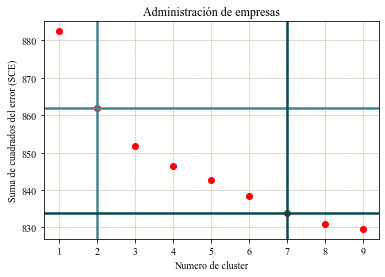

In [140]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Administración de empresas')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=2,linewidth = 2.5,color='#45858C')
plt.axhline(y=862,linewidth = 2.5,color='#45858C')

plt.axvline(x=7,linewidth = 2.5,color='#024959')
plt.axhline(y=834,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_administracion_empresas.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_administracion_empresas.png")

## Model & save

In [141]:
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600,  random_state=0, n_init=25)
# model.fit(features)
# pickle.dump(vectorizer, open('kmeans/Vtrasn.pkl','wb'))
# pickle.dump(model, open('kmeans/kmeans.pkl','wb'))

---
# Contabilidad y fiscalización	

---

In [142]:
data = df[df.category_id==1]
data.head(3)
print(len(data))

1407


In [143]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()

In [144]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

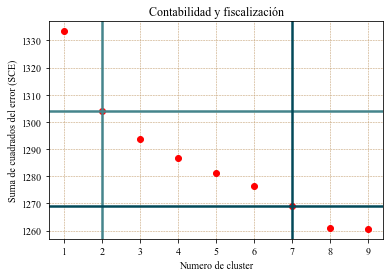

In [145]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Contabilidad y fiscalización')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=2,linewidth = 2.5,color='#45858C')
plt.axhline(y=1304,linewidth = 2.5,color='#45858C')

plt.axvline(x=7,linewidth = 2.5,color='#024959')
plt.axhline(y=1269,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_contabilidad.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_contabilidad.png")

---
# Derecho

---

In [146]:
data = df[df.category_id==2]
data.head(3)
# print(len(data))

,category,profile,category_id
2344,Derecho,somos una empresa 100% mexicana en el ramo log...,2
2345,Derecho,castillo márquez & abogados (área de litigio)s...,2
2346,Derecho,¡únete a nuestro equipo y se parte de este emo...,2


In [147]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()

In [148]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

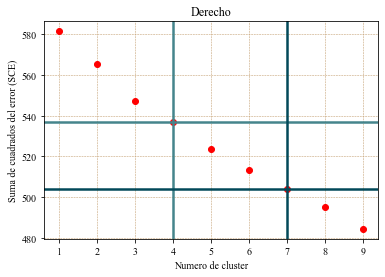

In [149]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Derecho')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=4,linewidth = 2.5,color='#45858C')
plt.axhline(y=537,linewidth = 2.5,color='#45858C')

plt.axvline(x=7,linewidth = 2.5,color='#024959')
plt.axhline(y=504,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_derecho.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_derecho.png")

---
# Docencia

---

In [150]:
data = df[df.category_id==3]
data.head(3)
# print(len(data))

,category,profile,category_id
2958,Docencia,coordinador(a) académico nivel secundaria.desc...,3
2959,Docencia,licenciatura en administración o área a fin (t...,3
2960,Docencia,licencuatura en educación primaria o alguna de...,3


In [151]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()

In [152]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

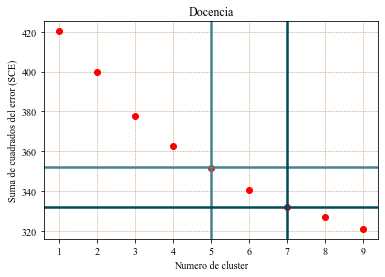

In [153]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Docencia')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=5,linewidth = 2.5,color='#45858C')
plt.axhline(y=352,linewidth = 2.5,color='#45858C')

plt.axvline(x=7,linewidth = 2.5,color='#024959')
plt.axhline(y=332,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_docencia.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_docencia.png")

---
# Tecnologías de la información y la comunicación

---

In [154]:
data = df[df.category_id==4]
data.head(3)
# print(len(data))

,category,profile,category_id
3409,Tecnologías de la información y la comunicación,netlogistik es una empresa dedicada a brindar ...,4
3410,Tecnologías de la información y la comunicación,en búsqueda de ingeniero de soporte.experienci...,4
3411,Tecnologías de la información y la comunicación,por crecimiento buscamosanalista de sistemasre...,4


In [155]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

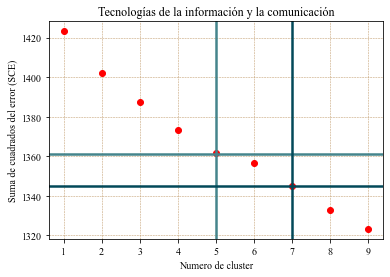

In [156]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Tecnologías de la información y la comunicación')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=5,linewidth = 2.5,color='#45858C')
plt.axhline(y=1361,linewidth = 2.5,color='#45858C')

plt.axvline(x=7,linewidth = 2.5,color='#024959')
plt.axhline(y=1345,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_informacion_comunicacion.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_informacion_comunicacion.png")

---
# Ingeniería

---

In [157]:
data = df[df.category_id==5]
data.head(3)
# print(len(data))

,category,profile,category_id
4565,"Ingeniería industrial, mecánica, electrónica &...","estratec, empresa lider en impresion y digital...",5
4566,"Ingeniería industrial, mecánica, electrónica &...","importante agencia de publicidad, con más de 3...",5
4567,"Ingeniería industrial, mecánica, electrónica &...",company descriptionit is an exciting time to j...,5


In [158]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

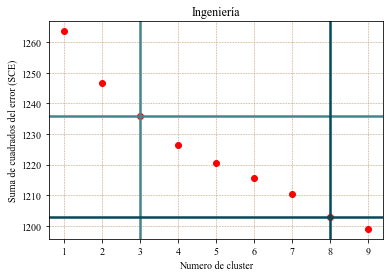

In [159]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Ingeniería')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=3,linewidth = 2.5,color='#45858C')
plt.axhline(y=1236,linewidth = 2.5,color='#45858C')

plt.axvline(x=8,linewidth = 2.5,color='#024959')
plt.axhline(y=1203,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_inge.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_inge.png")

---
# Medicina

---

In [160]:
data = df[df.category_id==6]
data.head(3)
# print(len(data))

,category,profile,category_id
6217,"Medicina, médico general, Médico pasante, radi...",ayudante general para estacionameintospara lab...,6
6218,"Medicina, médico general, Médico pasante, radi...","ormco, headquartered in brea, ca, is a global ...",6
6219,"Medicina, médico general, Médico pasante, radi...",importante consultoría dedicada a brindar serv...,6


In [161]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

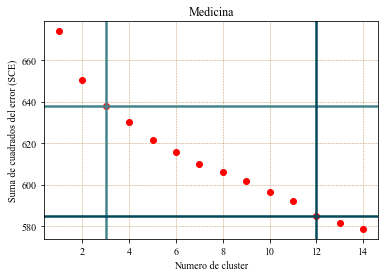

In [162]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Medicina')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=3,linewidth = 2.5,color='#45858C')
plt.axhline(y=638,linewidth = 2.5,color='#45858C')

plt.axvline(x=12,linewidth = 2.5,color='#024959')
plt.axhline(y=585,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_medicina.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_medicina.png")

---
# Enfermería

---

In [163]:
data = df[df.category_id==7]
data.head(3)
# print(len(data))

,category,profile,category_id
6931,Enfermería,estoy buscando auxiliar de enfermería:principa...,7
7699,Enfermería,estoy buscando auxiliar de enfermería:principa...,7
7700,Enfermería,-descripción del empleoen sohin buscamos verda...,7


In [164]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

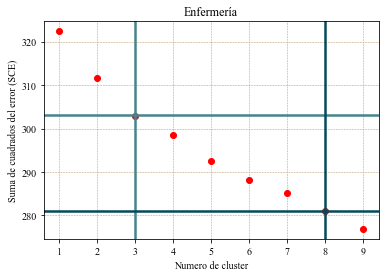

In [165]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Enfermería')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=3,linewidth = 2.5,color='#45858C')
plt.axhline(y=303,linewidth = 2.5,color='#45858C')

plt.axvline(x=8,linewidth = 2.5,color='#024959')
plt.axhline(y=281,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_enfermeria.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_enfermeria.png")

---
# Psicología

---

In [166]:
data = df[df.category_id==8]
data.head(3)
# print(len(data))

,category,profile,category_id
6932,Psicología,totalplay telecomunicaciones ( grupo salinas) ...,8
6933,Psicología,¡únete a nuestro equipo!en randstad ayudamos a...,8
6934,Psicología,"posting date apr 26, 2022 job number 22067345...",8


In [167]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

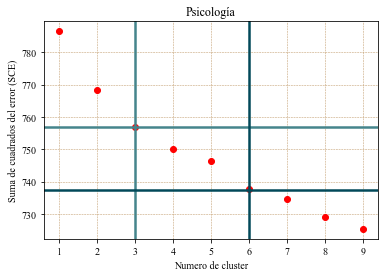

In [168]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Psicología')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=3,linewidth = 2.5,color='#45858C')
plt.axhline(y=757,linewidth = 2.5,color='#45858C')

plt.axvline(x=6,linewidth = 2.5,color='#024959')
plt.axhline(y=737.5,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_psicologia.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_psicologia.png")

---
# Ciencias de la computación

---

In [169]:
data = df[df.category_id==9]
data.head(3)
# print(len(data))

,category,profile,category_id
7012,Ciencias de la computación,empresa de seguridad privada solicita analista...,9
7013,Ciencias de la computación,para todos nuestros clientes hemos sido un ali...,9
7014,Ciencias de la computación,ingeniero junior de soporte técnico y soporte ...,9


In [170]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

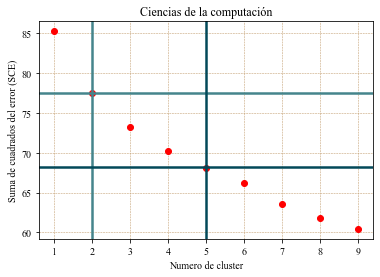

In [171]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Ciencias de la computación')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=2,linewidth = 2.5,color='#45858C')
plt.axhline(y=77.5,linewidth = 2.5,color='#45858C')

plt.axvline(x=5,linewidth = 2.5,color='#024959')
plt.axhline(y=68.2,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_cc.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_cc.png")

---
# Ayudante General

---

In [172]:
data = df[df.category_id==10]
data.head(3)
# print(len(data))

,category,profile,category_id
7111,Ayudante General,somos el primer supermercado mexicano sin tien...,10
7112,Ayudante General,"""el almacén sólo es el puente para poder llega...",10
7113,Ayudante General,ayudantes generalesedad: 18 años en adelanteex...,10


In [173]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

features = tfidf.fit_transform(data.profile).toarray()
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, max_iter=600,random_state=0, n_init=25, init='k-means++')
    km.fit(features)
    sse.append(km.inertia_)

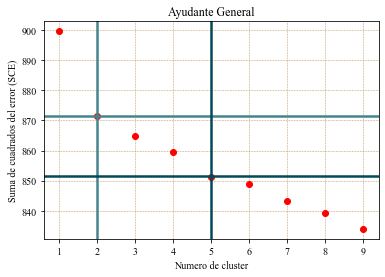

In [174]:
plt.rc('font',family='Times New Roman')
plt.xlabel('Numero de cluster')
plt.ylabel('Suma de cuadrados del error (SCE)')
plt.title('Ayudante General')

plt.plot(k_rng,sse,'ro')
plt.axvline(x=2,linewidth = 2.5,color='#45858C')
plt.axhline(y=871.5,linewidth = 2.5,color='#45858C')

plt.axvline(x=5,linewidth = 2.5,color='#024959')
plt.axhline(y=851.5,linewidth = 2.5,color='#024959')

plt.grid(color = '#BF9765', linestyle = '--', linewidth = 0.5)
plt.savefig("MDC/Metodo_del_codo_ayudante_general.eps",format='eps',dpi=1000)
plt.savefig("MDC/Metodo_del_codo_ayudante_general.png")